In [2]:
#supervised classification problem
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [31]:
#Bunch class similar to dict in python
print("Keys of iris dataset: \n{}".format(iris_dataset.keys()))

Keys of iris dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [32]:
print(iris_dataset['DESCR'][:200], "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive 
...


In [33]:
print("Target names : \n{}".format(iris_dataset["target_names"]))

Target names : 
['setosa' 'versicolor' 'virginica']


In [34]:
print("Feature names : \n{}".format(iris_dataset["feature_names"]))

Feature names : 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [35]:
print("Type of data : \n{}".format(type(iris_dataset["data"])))

Type of data : 
<class 'numpy.ndarray'>


In [36]:
print("Shape of data : \n{}".format(iris_dataset["data"].shape))

Shape of data : 
(150, 4)


In [37]:
print("First five columns of data : \n{}".format(iris_dataset["data"][:5]))

First five columns of data : 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [38]:
print("Shape of target : \n{}".format(iris_dataset["target"].shape))

Shape of target : 
(150,)


In [39]:
print("Target : \n {}".format(iris_dataset["target"]))

Target : 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset["data"],iris_dataset["target"], random_state = 0)
print("X_train shape : {} \ny_train shape : {}".format(X_train.shape,y_train.shape))

X_train shape : (112, 4) 
y_train shape : (112,)


In [48]:
print("X_test shape : {} \ny_test shape : {}".format(X_test.shape,y_test.shape))

X_test shape : (38, 4) 
y_test shape : (38,)


In [59]:
%matplotlib inline
import pandas as pd
from pandas.plotting import scatter_matrix

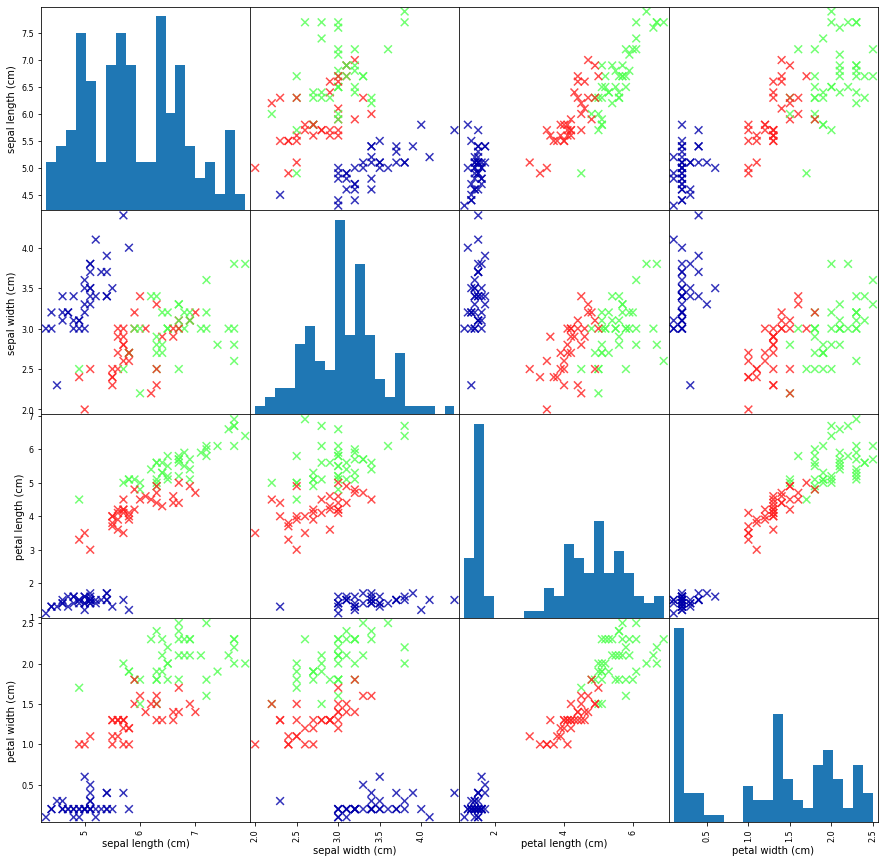

In [78]:
iris_df = pd.DataFrame(X_train, columns=iris_dataset["feature_names"])

#pair plot of iris dataset coloured by class labels
grr = scatter_matrix(iris_df, c=y_train, figsize=(15, 15), marker='x', hist_kwds={'bins':20}, s=60, alpha=0.8, cmap=mglearn.cm3)